C:\Users\Usuario\AppData\Local\Temp\ipykernel_17320\2802903795.py:43: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  length, _ = quad(arc_length_integrand, x_start, x_end, limit=100)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_17320\2802903795.py:45: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  area, _ = quad(func, x_start, x_end, limit=100)


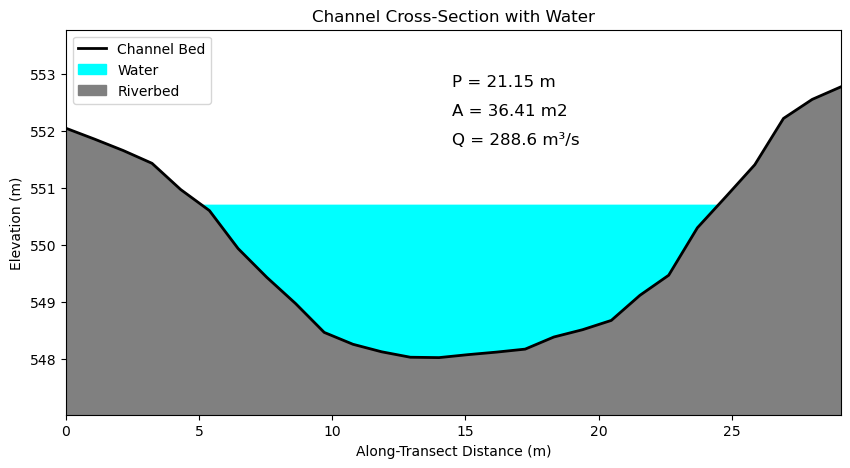

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Cross-section coordinates (x and z values)
data = {
    'x': [0, 1.077696746, 2.155393492, 3.233090237, 4.310786983, 5.388483729, 6.466180475, 7.543877221, 
          8.621573967, 9.699270712, 10.77696746, 11.8546642, 12.93236095, 14.0100577, 15.08775444, 
          16.16545119, 17.24314793, 18.32084468, 19.39854142, 20.47623817, 21.55393492, 22.63163166, 
          23.70932841, 24.78702515, 25.8647219, 26.94241865, 28.02011539, 29.09781214],
    'z': [552.0439453, 551.8529053, 551.6530151, 551.4296265, 550.9699707, 550.6017456, 549.9367065, 
          549.4327393, 548.9751587, 548.468811, 548.2611084, 548.1293945, 548.0340576, 548.0276489, 
          548.0790405, 548.1238403, 548.1762085, 548.3883057, 548.5161743, 548.6787109, 549.1192017, 
          549.4696655, 550.3006592, 550.848877, 551.4048462, 552.2157593, 552.5487671, 552.7687378]
}
# Linear interpolation for z(x)
def func(x):
    return np.interp(x, x_data, z_data)

# Numerical derivative of the interpolated function (using finite differences)
def derivative(x, delta=1e-5):
    return (func(x + delta) - func(x)) / delta

# Arc length integrand using the derivative
def arc_length_integrand(x):
    return np.sqrt(1 + derivative(x)**2)

# Create interpolation functions for z(x) and its derivative
x_data = np.array(data['x'])
z_data = np.array(data['z'])

# Set up variables for area and perimeter calculations
x_min = 29 / 2
delta_x = 0.5
rows = int(29 / (delta_x*2))
n = 0.03
s = 0.02741

x_start = x_min - 20 * delta_x
x_end = x_min + 20 * delta_x

# Perimeter (arc length)
length, _ = quad(arc_length_integrand, x_start, x_end, limit=100)
# Area calculation
area, _ = quad(func, x_start, x_end, limit=100)
z_end = func(x_end)
area_h = z_end * (x_end - x_start) - area
# Flow
Q = area_h**(5/3)*s**0.5/(n*length**(2/3))

# Convert data to numpy arrays
x = np.array(data['x'])
z = np.array(data['z'])

# Define the water level (you can adjust this value)
water_level = z_end

# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the cross-section profile (channel bed)
ax.plot(x, z, 'k-', linewidth=2, label='Channel Bed')

# Fill the area under the water level with cyan to represent water
ax.fill_between(x, z, water_level, where=(z < water_level), color='cyan', label='Water', interpolate=True)

# Fill the area below the channel bed to represent the riverbed
ax.fill_between(x, z, np.min(z) - 1, color='gray', label='Riverbed')

# Labels and title
ax.set_xlabel('Along-Transect Distance (m)')
ax.set_ylabel('Elevation (m)')
ax.set_title('Channel Cross-Section with Water')

# Add a text annotation for discharge (Q)
ax.text(x_min, np.max(z)- 0.5, f'A = {np.round(area_h,2)} m2', fontsize=12, color='black')
ax.text(x_min, np.max(z), f'P = {np.round(length,2)} m', fontsize=12, color='black')
ax.text(x_min, np.max(z) - 1, f'Q = {np.round(Q,2)} m³/s', fontsize=12, color='black')

# Set the plot limits based on the actual data
ax.set_xlim([np.min(x), np.max(x)])
ax.set_ylim([np.min(z) - 1, np.max(z) + 1])

# Add a legend
ax.legend()

# Show the plot
plt.show()